In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("./BankChurners.csv")
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
categorical_features = [column for column in data.columns if data[column].dtype not in ["int64", "float64"]]
categorical_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [6]:
for feature in categorical_features:
    print(f"{feature}: {sorted(data[feature].unique())}")

Attrition_Flag: ['Attrited Customer', 'Existing Customer']
Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']


In [7]:
data["Attrition_Flag"].replace({"Attrited Customer": 0, "Existing Customer": 1}, inplace=True)

In [8]:
data["Education_Level"].replace({
    "Unknown": 0,
    "Uneducated": 1,
    "High School": 2,
    "College": 3,
    "Graduate": 4,
    "Post-Graduate": 5,
    "Doctorate": 6,
}, inplace=True)
data["Income_Category"].replace({
    "Unknown": 0,
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$60K - $80K": 3,
    "$80K - $120K": 4,
    "$120K +": 5,
}, inplace=True)
data["Card_Category"].replace({
    "Blue": 0,
    "Silver": 1,
    "Gold": 2,
    "Platinum": 3,
}, inplace=True)

data.drop(columns=["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

data = pd.get_dummies(data, columns=["Gender", "Marital_Status"])
data

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,1,49,5,4,1,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,1,51,3,4,4,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,1,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,1,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,4,2,0,40,3,2,3,...,15476,117,0.857,0.462,0,1,0,0,1,0
10123,0,41,2,0,2,0,25,4,2,3,...,8764,69,0.683,0.511,0,1,1,0,0,0
10124,0,44,1,2,1,0,36,5,3,4,...,10291,60,0.818,0.000,1,0,0,1,0,0
10125,0,30,2,4,2,0,36,4,3,3,...,8395,62,0.722,0.000,0,1,0,0,0,1


In [9]:
train_x, test_x = train_test_split(data, test_size=0.2, stratify=data["Attrition_Flag"], random_state=42)
train_y = train_x.pop("Attrition_Flag")
test_y = test_x.pop("Attrition_Flag")

In [10]:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(train_x, train_y)

print(f"Training accuracy: {accuracy_score(rf_cls.predict(train_x), train_y)}")
print(f"Test accuracy: {accuracy_score(rf_cls.predict(test_x), test_y)}")
print(f"Classification report:\n{classification_report(test_y, rf_cls.predict(test_x))}")

Training accuracy: 1.0
Test accuracy: 0.9595261599210266
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



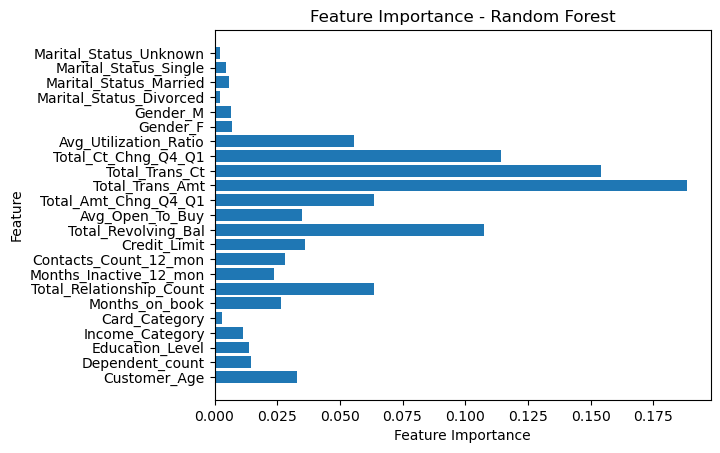

In [11]:
feature_importances = rf_cls.feature_importances_
feature_names = train_x.columns

plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()

In [12]:
xgb_cls = XGBClassifier(objective="binary:logistic", use_label_encoder=False)
xgb_cls.fit(train_x, train_y)

print(f"Training accuracy: {accuracy_score(xgb_cls.predict(train_x), train_y)}")
print(f"Test accuracy: {accuracy_score(xgb_cls.predict(test_x), test_y)}")
print(f"Classification report:\n{classification_report(test_y, xgb_cls.predict(test_x))}")

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Training accuracy: 1.0
Test accuracy: 0.9743336623889437
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       325
           1       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



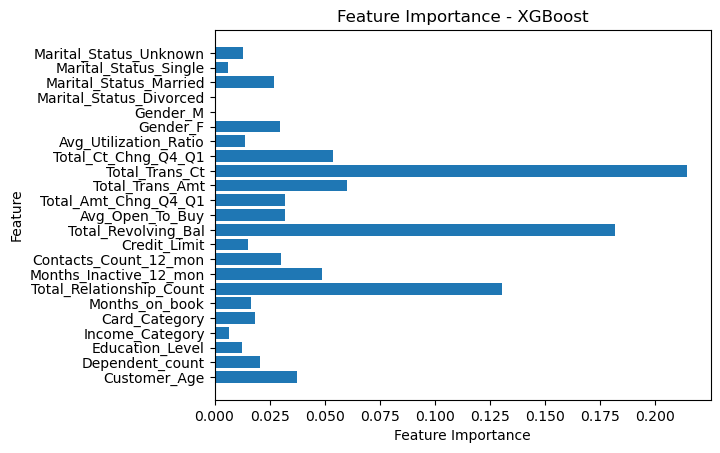

In [13]:
feature_importances = xgb_cls.feature_importances_
feature_names = train_x.columns

plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - XGBoost")
plt.show()